In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

**1. Data Preparation:**

In [ ]:
df=pd.read_excel("/content/heart_disease.xlsx",sheet_name='Heart_disease')

**2. Exploratory Data Analysis (EDA):**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   sex       908 non-null    object 
 2   cp        908 non-null    object 
 3   trestbps  908 non-null    int64  
 4   chol      908 non-null    int64  
 5   fbs       908 non-null    bool   
 6   restecg   908 non-null    object 
 7   thalch    908 non-null    int64  
 8   exang     908 non-null    object 
 9   oldpeak   846 non-null    float64
 10  slope     908 non-null    object 
 11  thal      908 non-null    object 
 12  num       908 non-null    int64  
dtypes: bool(1), float64(1), int64(5), object(6)
memory usage: 86.1+ KB


In [ ]:
df.isnull().mean()*100

,0
age,0.000000
sex,0.000000
cp,0.000000
trestbps,0.000000
chol,0.000000
fbs,0.000000
restecg,0.000000
thalch,0.000000
exang,0.000000
oldpeak,6.828194


In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.shape

(692, 13)

In [ ]:
df.isnull().mean()*100

,0
age,0.000000
sex,0.000000
cp,0.000000
trestbps,0.000000
chol,0.000000
fbs,0.000000
restecg,0.000000
thalch,0.000000
exang,0.000000
oldpeak,6.835722


In [ ]:
df['oldpeak'] = df['oldpeak'].fillna(df['oldpeak'].mean())
df.isna().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalch,0
exang,0
oldpeak,0


In [ ]:
df[(df['age']==58) & (df['sex']== 'Male') & (df['cp']== 'non-anginal') & (df['trestbps']== 150) & (df['chol']== 219)]

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
764,58,Male,non-anginal,150,219,False,st-t abnormality,118,True,0.0,downsloping,normal,2


In [ ]:
df = df.drop_duplicates()
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0


In [ ]:
df.describe()

,age,trestbps,chol,thalch,oldpeak,num
count,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000
mean,53.787211,133.412348,201.465270,135.976847,0.892308,1.007718
std,9.162016,20.405432,112.158285,26.813075,1.055993,1.144594
min,29.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.500000,120.000000,176.500000,118.000000,0.000000,0.000000
50%,54.000000,130.000000,224.000000,138.000000,0.800000,1.000000
75%,60.000000,144.000000,270.000000,156.000000,1.500000,2.000000
max,77.000000,200.000000,603.000000,202.000000,6.200000,4.000000


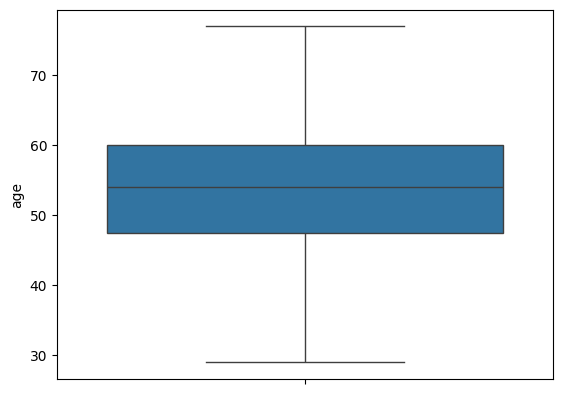

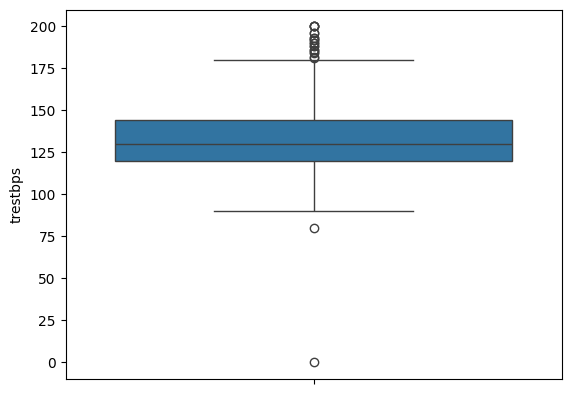

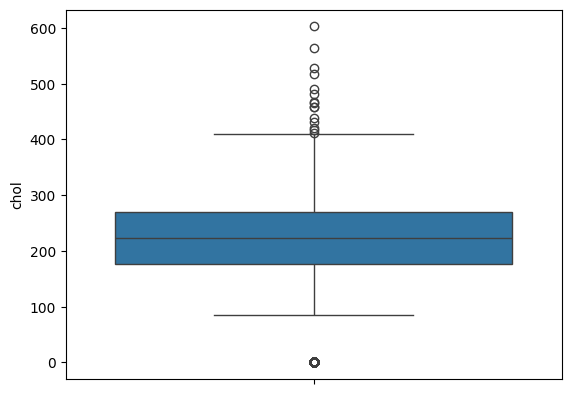

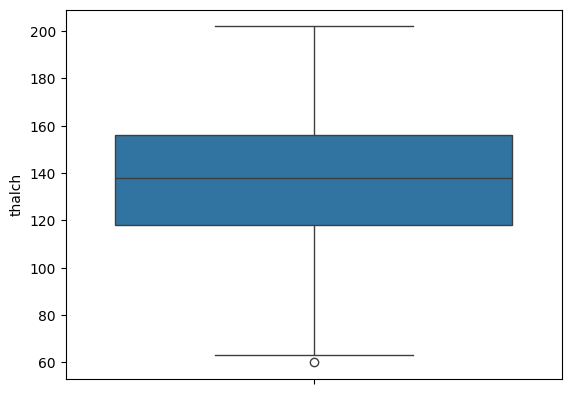

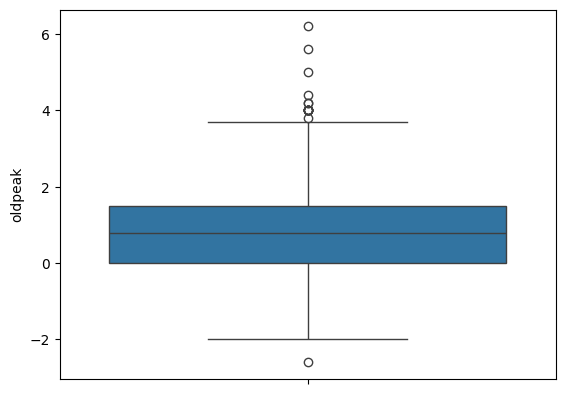

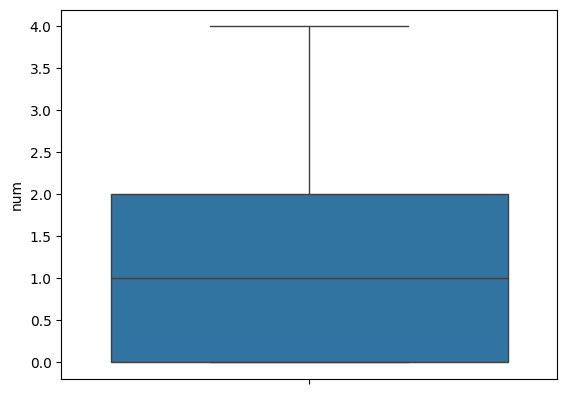

In [ ]:
for i in df.describe().columns:
  sns.boxplot(data=df[i])
  plt.show()

In [ ]:
outlier_columns = ['trestbps', 'chol', 'thalch', 'oldpeak']

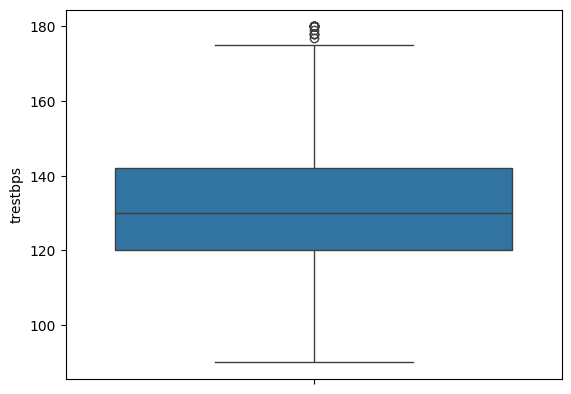

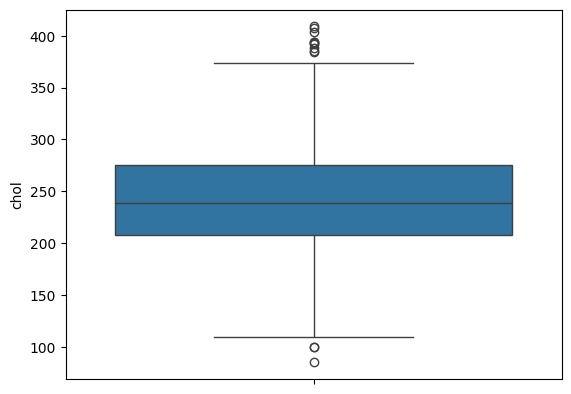

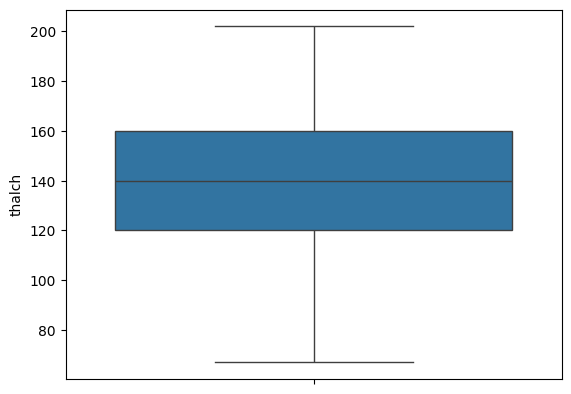

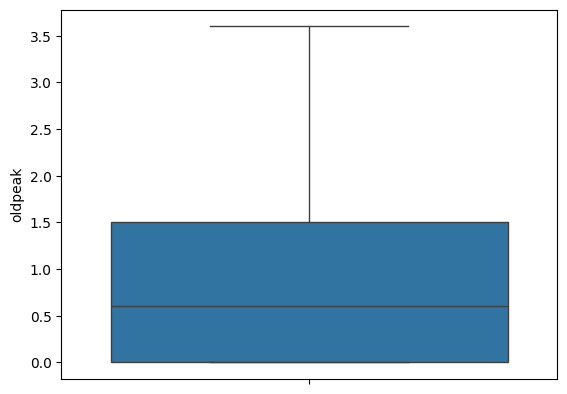

In [ ]:
for i in outlier_columns:
    Q1 = df[i].quantile(0.25)
    Q3 = df[i].quantile(0.75)
    IQR = Q3 - Q1
    upper_limit = Q3 + 1.5 * IQR
    lower_limit = Q1 - 1.5 * IQR
    df = df[~((df[i] < lower_limit) | (df[i] > upper_limit))]
    sns.boxplot(data=df[i])
    plt.show()

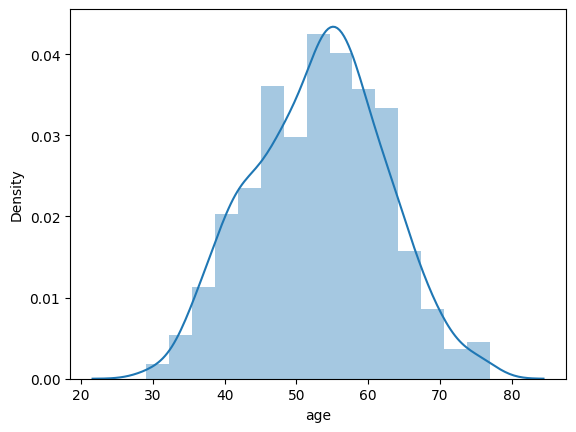

In [ ]:
sns.distplot(df['age'],kde=True,bins=15,hist=True)
plt.show()

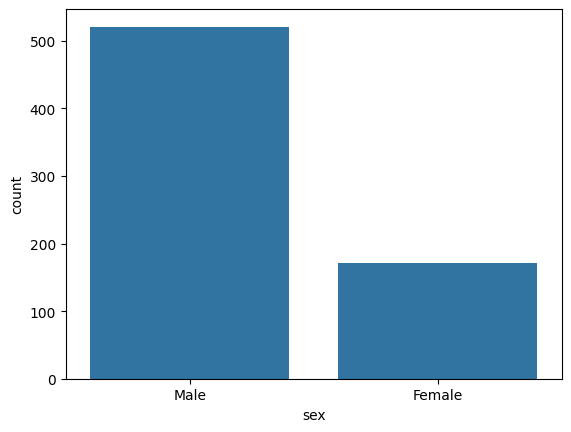

In [ ]:
sns.countplot(data=df,x='sex')
plt.show()

In [ ]:
import plotly.express as px
data = df.groupby('sex')['num'].value_counts().reset_index(name='count')
fig = px.bar(data, x='sex', y='count', color='num', barmode='group',template='plotly_white')
fig.update_layout(title='Heart Disease Count by Sex',title_x=0.5,xaxis_title='Sex',yaxis_title='Count',legend_title='Heart Disease')
fig.show()

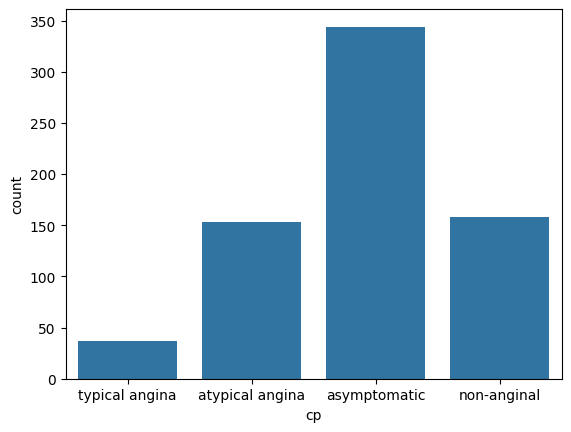

In [ ]:
sns.countplot(data=df,x='cp')
plt.show()

In [ ]:
data = df.groupby('cp')['num'].value_counts().reset_index(name='count')
fig = px.bar(data, x='cp', y='count', color='num', barmode='group',template='plotly_white')
fig.update_layout(title='Heart Disease Count by Chest Pain Type',title_x=0.5,xaxis_title='Chest Pain Type',yaxis_title='Count',legend_title='Heart Disease')
fig.show()

In [ ]:
fig = px.pie(df,names='cp',title='Fasting Blood Sugar',template='plotly_white')
fig.update_traces(textposition='inside', textinfo='percent+label',textfont_color='black')
fig.update_layout(title_x=0.8)
fig.show()

In [ ]:
fig = px.histogram(df,x='trestbps',template='plotly_white',text_auto=True)
fig.update_traces(marker_line_width=1.8, marker_line_color='white')
fig.update_layout(title='Distribution of resting blood pressure',title_x=0.5)
fig.show()

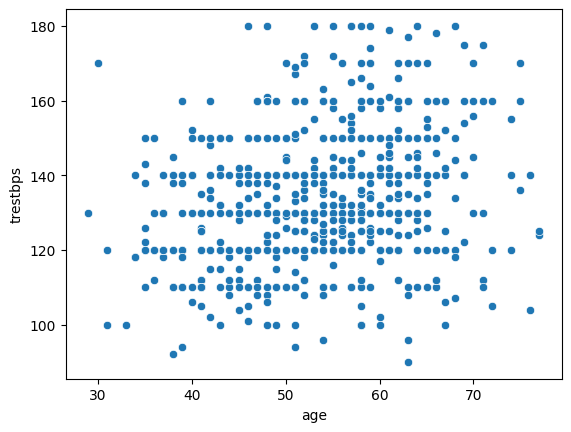

In [ ]:
sns.scatterplot(data=df,x='age',y='trestbps')
plt.show()

In [ ]:
fig = px.histogram(df,x='chol',template='plotly_white',text_auto=True,nbins=25)
fig.update_traces(marker_line_width=1.5, marker_line_color='white')
fig.update_layout(title='Distribution of serum cholesterol',title_x=0.5)
fig.show()

In [ ]:
px.scatter(df,x='chol',y='age',color='trestbps',template='plotly_white')

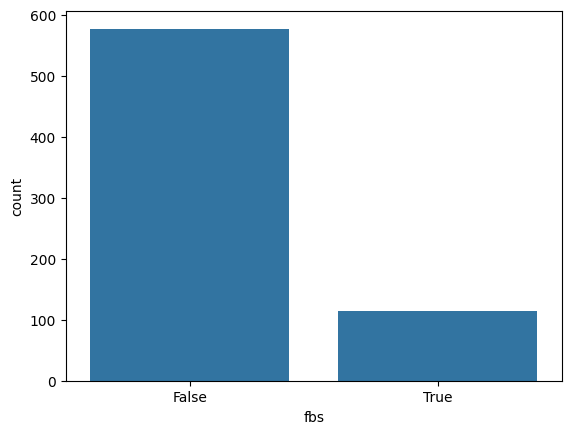

In [ ]:
sns.countplot(data=df,x='fbs')
plt.show()

In [ ]:
data = df.groupby('fbs')['num'].value_counts().reset_index(name='count')
fig = px.bar(data, x='fbs', y='count', color='num', barmode='group',template='plotly_white')
fig.update_layout(title='Heart Disease Count by Fasting Blood Sugar',title_x=0.5,xaxis_title='Fasting Blood Sugar',yaxis_title='Count',legend_title='Heart Disease')
fig.show()

In [ ]:
fig = px.histogram(df,x='thalch',nbins=15,template='plotly_white',text_auto=True)
fig.update_traces(marker_line_width=1.5, marker_line_color='white')
fig.update_layout(title='Distribution of maximum heart rate achieved',title_x=0.5)
fig.show()

In [ ]:
px.scatter(df,x='thalch',y='age',color='chol',template='plotly_dark')

In [ ]:
data = df.groupby('exang')['num'].value_counts().reset_index(name='count')
fig = px.bar(data, x='exang', y='count', color='num',template='plotly_white',text_auto=True)
fig.update_layout(title='Exercise-Induced Angina',title_x=0.5)
fig.show()

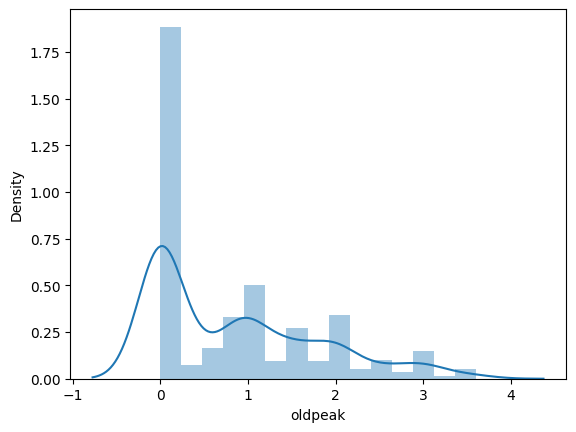

In [ ]:
sns.distplot(df['oldpeak'],kde=True,bins=15,hist=True)
plt.show()

In [ ]:
px.scatter(df,x='age',y='chol',color='oldpeak',template='plotly_white')

In [ ]:
data = df['slope'].value_counts().reset_index()
fig = px.bar(data, x='slope', y='count',color='slope',template='plotly_white',text_auto=True)
fig.update_layout(title='Distribution of slope of the peak exercise ST segment',title_x=0.5)
fig.show()

In [ ]:
data = df.groupby('slope')['num'].value_counts().reset_index(name='count')
fig = px.bar(data, x='slope', y='count', color='num',barmode='group',template='plotly_white')
fig.update_layout(title='Heart Disease Count by Slope',title_x=0.5,xaxis_title='Slope',yaxis_title='Count',legend_title='Heart Disease')
fig.show()

In [ ]:
data = df['thal'].value_counts().reset_index()
fig = px.bar(data, x='thal', y='count',color='thal',template='plotly_white',text_auto=True)
fig.update_layout(title='Distribution of thalassemia',title_x=0.5)
fig.show()

In [ ]:
data = df.groupby('thal')['num'].value_counts().reset_index(name='count')
fig = px.bar(data, x='thal', y='count', color='num',barmode='group',template='plotly_white')
fig.update_layout(title='Heart Disease Count by Thalassemia',title_x=0.5,xaxis_title='Thalassemia',yaxis_title='Count',legend_title='Heart Disease')
fig.show()

In [ ]:
data = df['num'].value_counts().reset_index()
fig = px.bar(data, x='num', y='count',color='num',template='plotly_white',text_auto=True)
fig.update_layout(title='Distribution of target variable',title_x=0.5)
fig.show()

In [ ]:
fig = px.pie(df,names='num',title='Level of Heart Desaese',template='plotly_white')
fig.update_traces(textposition='inside', textinfo='percent+label',textfont_color='black')
fig.update_layout(title_x=0.5)
fig.show()

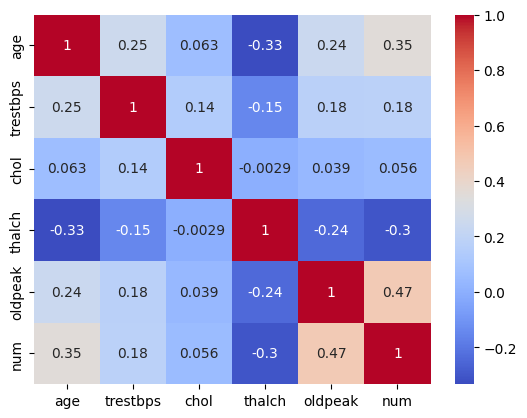

In [ ]:
corr = df[df.describe().columns].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

**3. Feature Engineering:**

In [ ]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [ ]:
label_encoder = LabelEncoder()
label_encoder

LabelEncoder()

In [ ]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalch',
       'exang', 'oldpeak', 'slope', 'thal', 'num'],
      dtype='object')

In [ ]:
df['sex'] = label_encoder.fit_transform(df['sex'])
df['cp'] = label_encoder.fit_transform(df['cp'])
df['fbs'] = label_encoder.fit_transform(df['fbs'])
df['restecg'] = label_encoder.fit_transform(df['restecg'])
df['slope'] = label_encoder.fit_transform(df['slope'])
df['thal'] = label_encoder.fit_transform(df['thal'])
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,1,3,145,233,1,0,150,False,2.3,0,0,0
1,41,1,1,135,203,0,1,132,False,0.0,1,0,0
2,57,1,0,140,192,0,1,148,False,0.4,1,0,0
3,52,1,3,118,186,0,0,190,False,0.0,1,0,0
4,57,1,0,110,201,0,1,126,True,1.5,1,0,0


In [ ]:
df['exang'] = df['exang'].astype(bool)
df['exang'] = df['exang'].astype(int)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,1,3,145,233,1,0,150,0,2.3,0,0,0
1,41,1,1,135,203,0,1,132,0,0.0,1,0,0
2,57,1,0,140,192,0,1,148,0,0.4,1,0,0
3,52,1,3,118,186,0,0,190,0,0.0,1,0,0
4,57,1,0,110,201,0,1,126,1,1.5,1,0,0


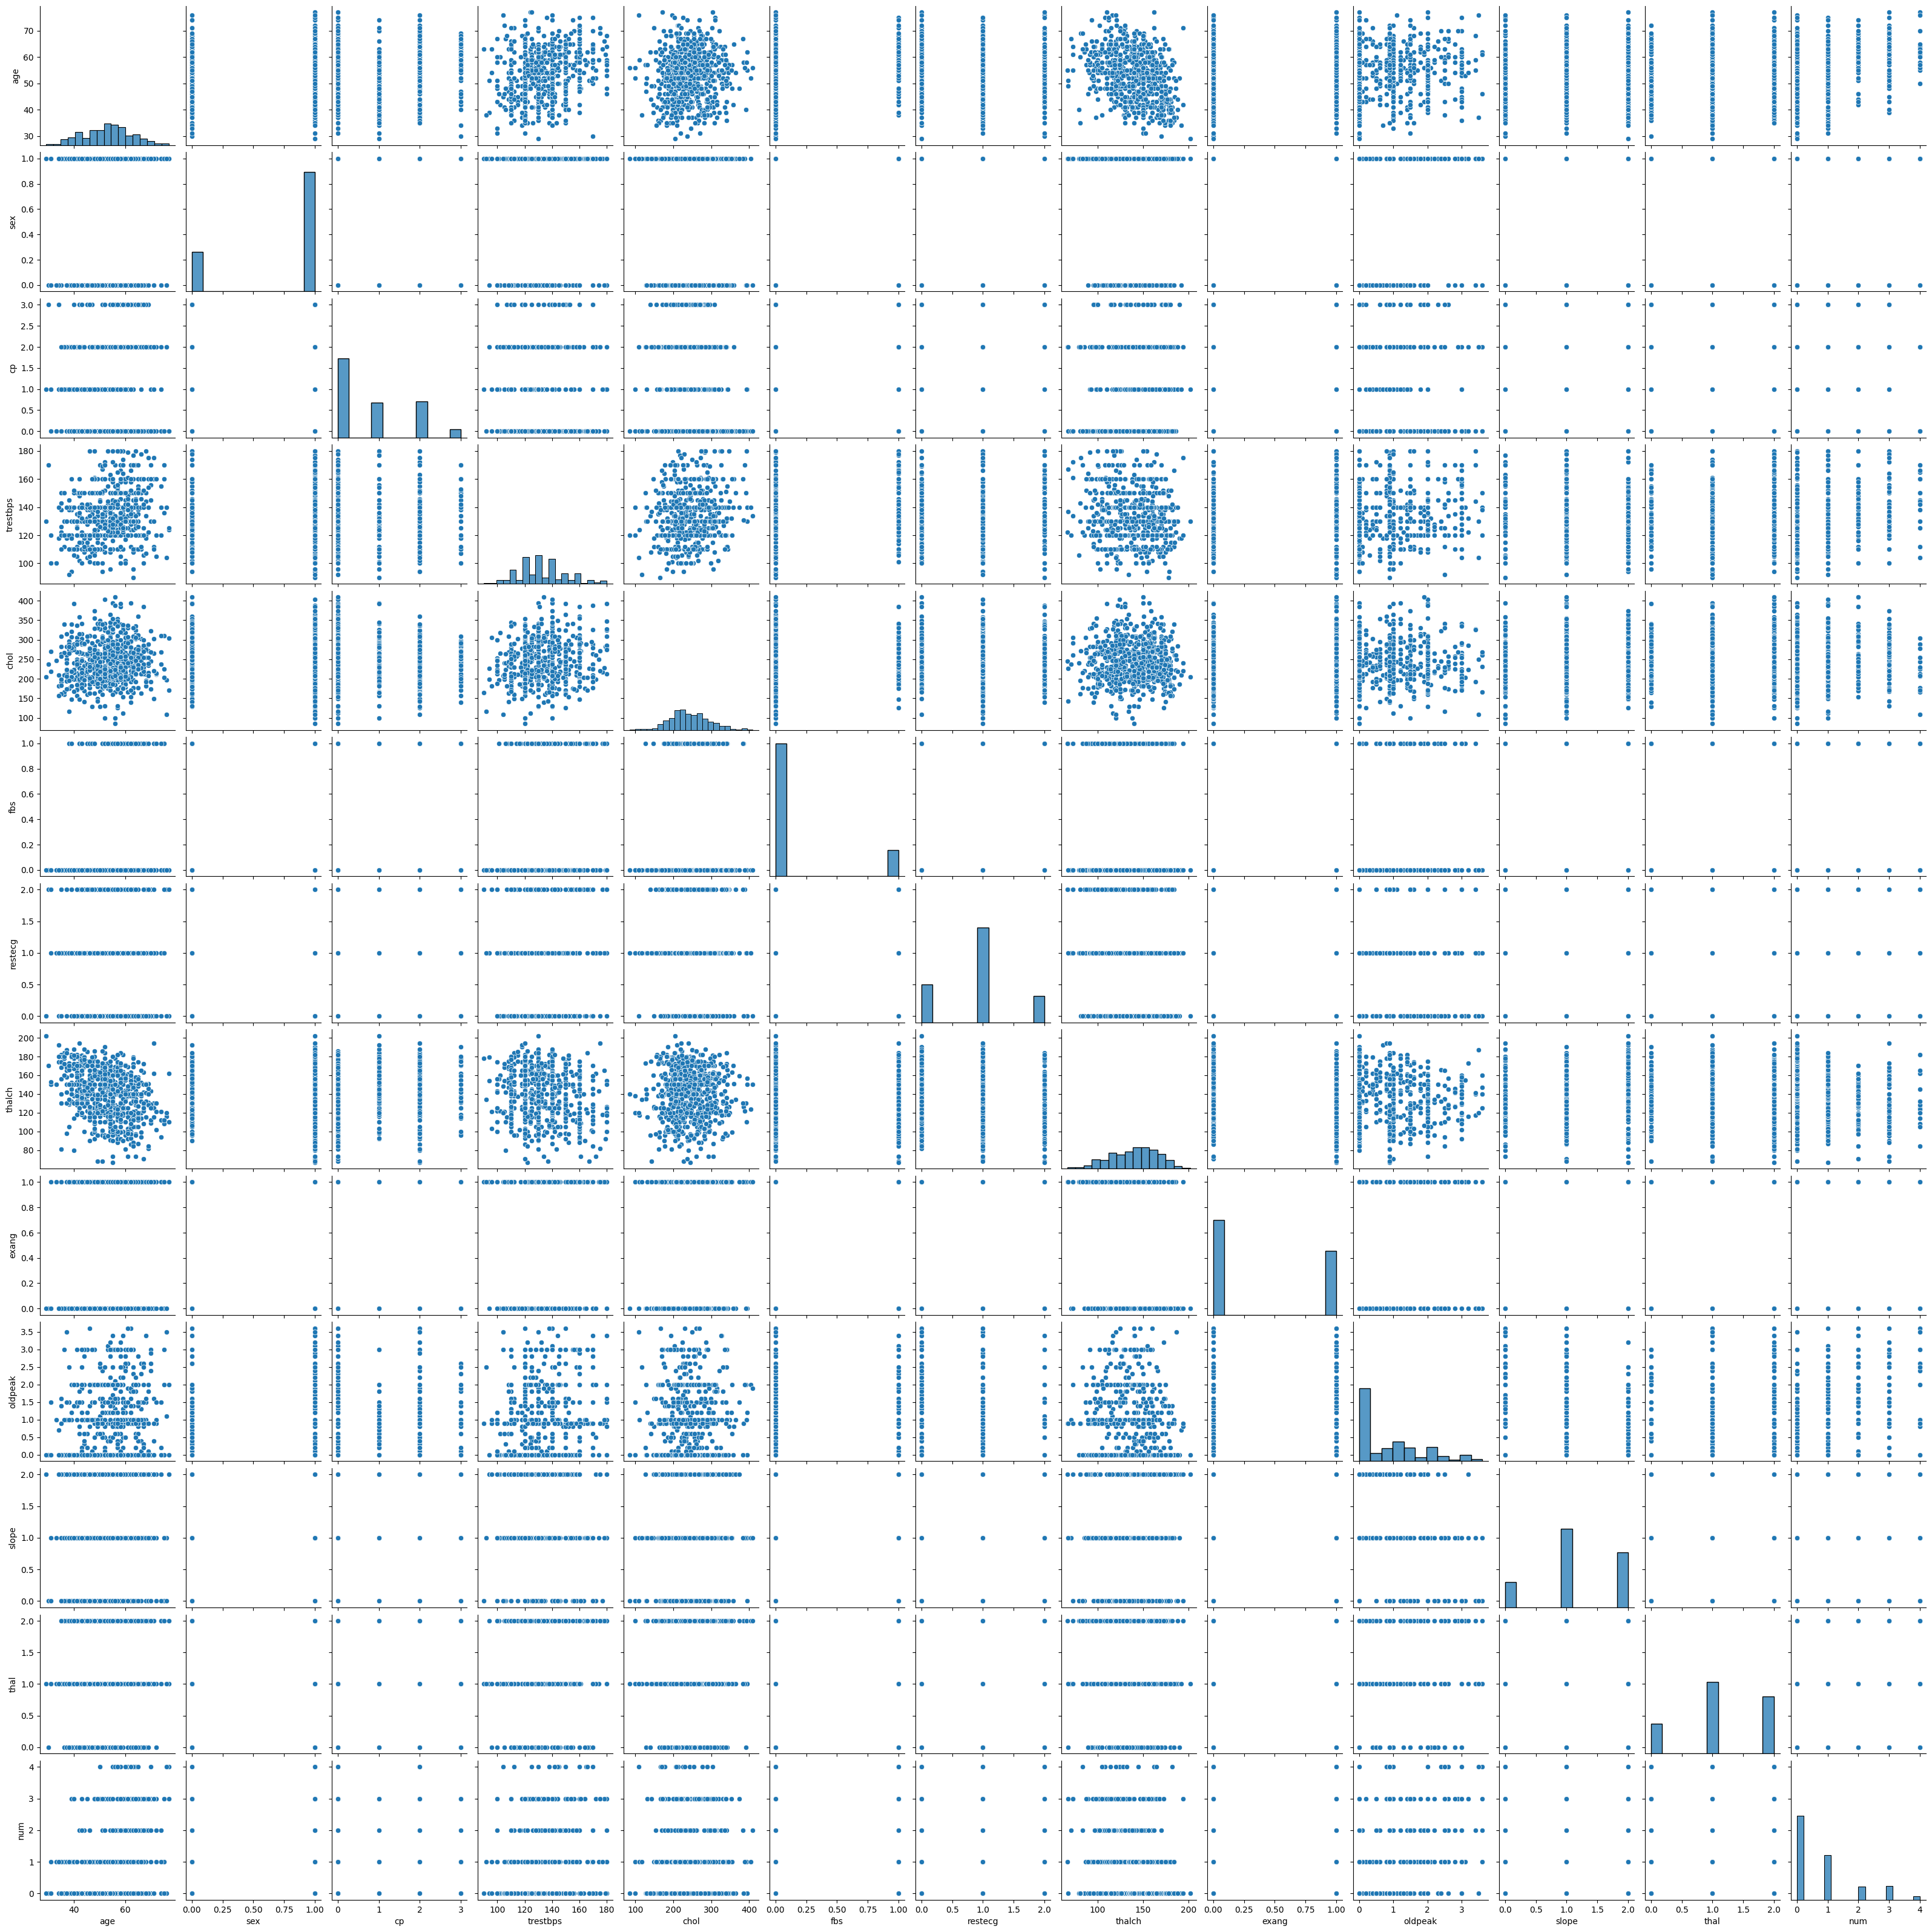

In [ ]:
sns.pairplot(df)
plt.show()

**4. Decision Tree Classification:**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc, roc_auc_score

In [ ]:
X = df.drop('num', axis=1)
y = df['num']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
Decision_tree = DecisionTreeClassifier(criterion='entropy',max_depth=5)
Decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [ ]:
print('Train Accuracy:', Decision_tree.score(X_train, y_train))
print('Test Accuracy:', Decision_tree.score(X_test, y_test))

Train Accuracy: 0.6943942133815552
Test Accuracy: 0.5755395683453237


In [ ]:
y_pred = Decision_tree.predict(X_test)
y_pred[:5]

array([1, 1, 0, 0, 0])

In [ ]:
print(classification_report(y_test, Decision_tree.predict(X_test)))

              precision    recall  f1-score   support

           0       0.77      0.82      0.79        82
           1       0.31      0.43      0.36        30
           2       0.00      0.00      0.00        10
           3       0.00      0.00      0.00        14
           4       0.00      0.00      0.00         3

    accuracy                           0.58       139
   macro avg       0.22      0.25      0.23       139
weighted avg       0.52      0.58      0.55       139



In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix

array([[67, 14,  1,  0,  0],
       [11, 13,  1,  5,  0],
       [ 4,  6,  0,  0,  0],
       [ 5,  8,  1,  0,  0],
       [ 0,  1,  0,  2,  0]])

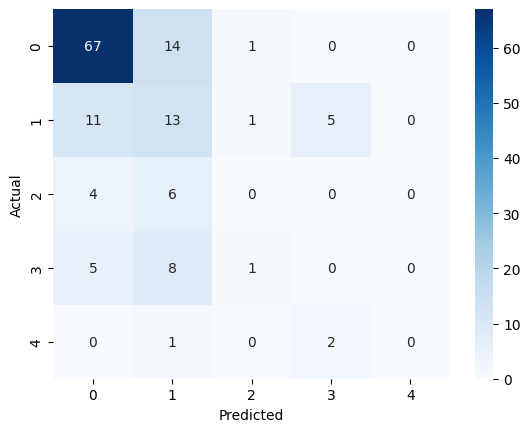

In [ ]:
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
y_pred_proba = Decision_tree.predict_proba(X_test) # Get predicted probabilities
print('ROC Score is:', roc_auc_score(y_test, y_pred_proba, multi_class='ovr'))

ROC Score is: 0.7119460577175276


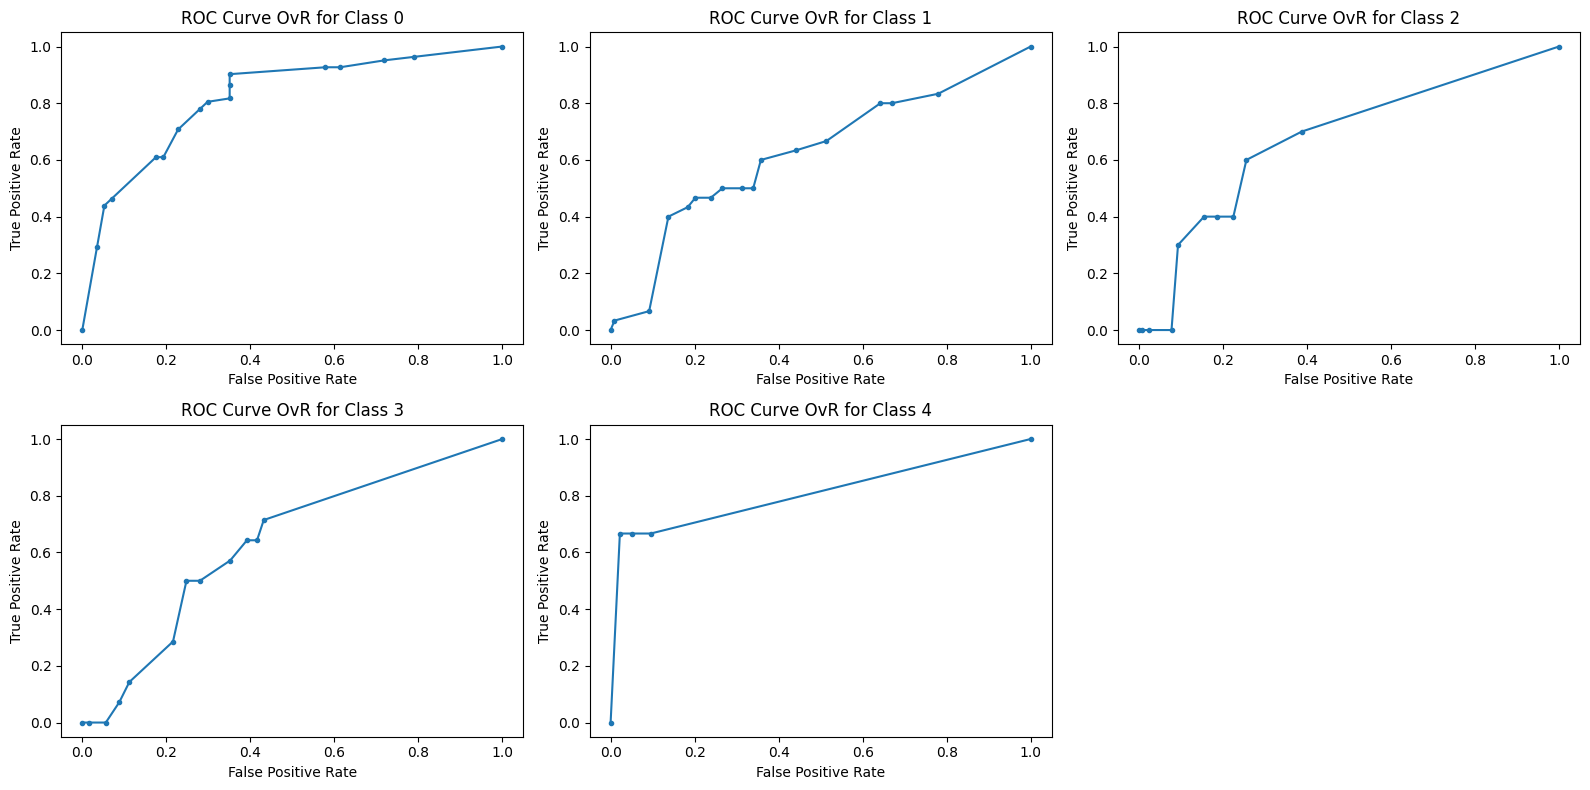

ROC AUC OvR for class 0: 0.82
ROC AUC OvR for class 1: 0.63
ROC AUC OvR for class 2: 0.67
ROC AUC OvR for class 3: 0.63
ROC AUC OvR for class 4: 0.81


In [ ]:
plt.figure(figsize=(16, 8))
classes = Decision_tree.classes_  # Assuming this gives the list of class labels
roc_auc_ovr = {}

for i in range(len(classes)):
    # Gets the class
    c = classes[i]

    # Prepares an auxiliary dataframe to help with the ROC curve
    df_aux = X_test.copy()  # X_test is your test data (features)
    df_aux['class'] = [1 if y == c else 0 for y in y_test]  # y_test is your test data (true labels)
    df_aux['prob'] = y_pred_proba[:, i]  # y_proba is the predicted probabilities from the model

    # Calculates the ROC Coordinates and plots the ROC Curves
    fpr, tpr, _ = roc_curve(df_aux['class'], df_aux['prob'])
    ax = plt.subplot(2, 3, i+1)
    ax.plot(fpr, tpr, marker='.')
    ax.set_title(f"ROC Curve OvR for Class {c}")
    ax.set_xlabel("False Positive Rate")
    ax.set_ylabel("True Positive Rate")

    # Calculates the ROC AUC OvR
    roc_auc_ovr[c] = roc_auc_score(df_aux['class'], df_aux['prob'])

plt.tight_layout()
plt.show()

# Print ROC AUC scores
for c in roc_auc_ovr:
    print(f"ROC AUC OvR for class {c}: {roc_auc_ovr[c]:.2f}")

**5. Hyperparameter Tuning:**

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid = {
    'criterion': ['gini', 'entropy'],  # Criterion for splitting
    'max_depth': [None, 5,10, 20, 30, 40, 50],  # Maximum depth of the tree
}

In [ ]:
dt = DecisionTreeClassifier(random_state=42)

In [ ]:
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)


Fitting 5 folds for each of 14 candidates, totalling 70 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 10, 20, 30, 40, 50]},
             scoring='accuracy', verbose=1)

In [ ]:
print("Best Parameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_

Best Parameters: {'criterion': 'gini', 'max_depth': 5}


**6. Model Evaluation and Analysis:**

In [ ]:
print("Best Parameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_

Best Parameters: {'criterion': 'gini', 'max_depth': 5}


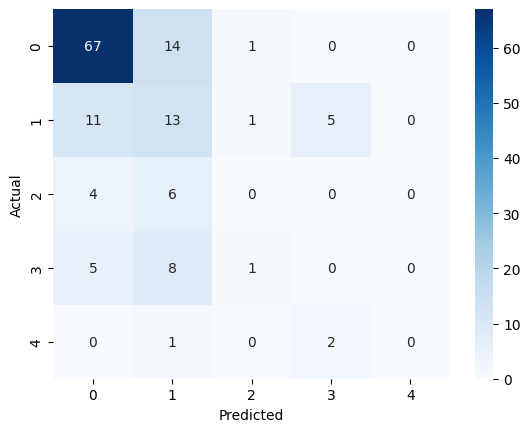

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
y_pred_proba = best_model.predict_proba(X_test) # Get predicted probabilities
print('ROC Score is:', roc_auc_score(y_test, y_pred_proba, multi_class='ovr'))

ROC Score is: 0.7764139147416053


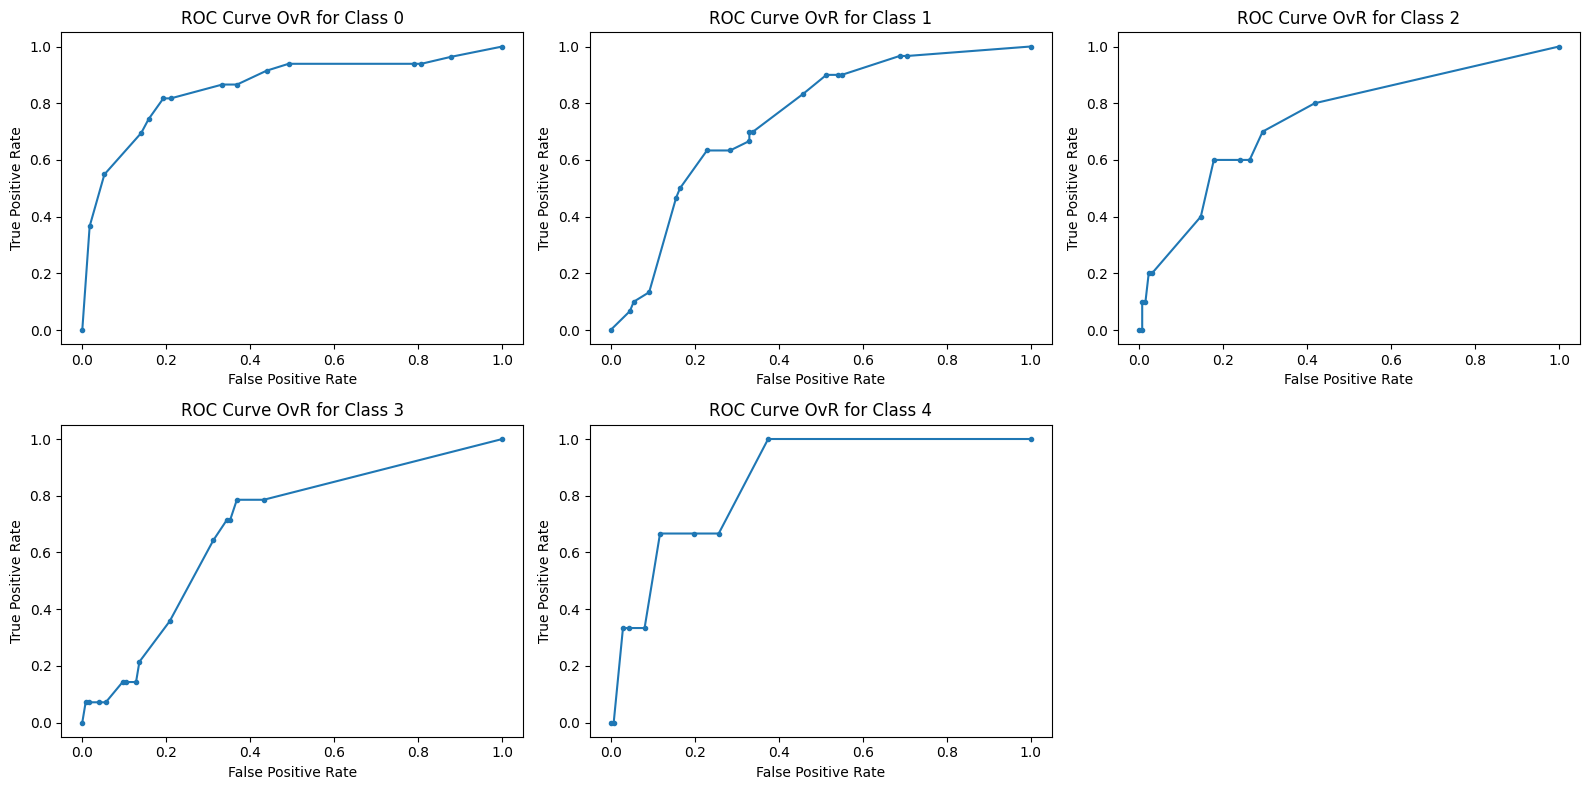

ROC AUC OvR for class 0: 0.86
ROC AUC OvR for class 1: 0.74
ROC AUC OvR for class 2: 0.74
ROC AUC OvR for class 3: 0.68
ROC AUC OvR for class 4: 0.86


In [ ]:
plt.figure(figsize=(16, 8))
classes = best_model.classes_  # Assuming this gives the list of class labels
roc_auc_ovr = {}

for i in range(len(classes)):
    # Gets the class
    c = classes[i]

    # Prepares an auxiliary dataframe to help with the ROC curve
    df_aux = X_test.copy()  # X_test is your test data (features)
    df_aux['class'] = [1 if y == c else 0 for y in y_test]  # y_test is your test data (true labels)
    df_aux['prob'] = y_pred_proba[:, i]  # y_proba is the predicted probabilities from the model

    # Calculates the ROC Coordinates and plots the ROC Curves
    fpr, tpr, _ = roc_curve(df_aux['class'], df_aux['prob'])
    ax = plt.subplot(2, 3, i+1)
    ax.plot(fpr, tpr, marker='.')
    ax.set_title(f"ROC Curve OvR for Class {c}")
    ax.set_xlabel("False Positive Rate")
    ax.set_ylabel("True Positive Rate")

    # Calculates the ROC AUC OvR
    roc_auc_ovr[c] = roc_auc_score(df_aux['class'], df_aux['prob'])

plt.tight_layout()
plt.show()

# Print ROC AUC scores
for c in roc_auc_ovr:
    print(f"ROC AUC OvR for class {c}: {roc_auc_ovr[c]:.2f}")

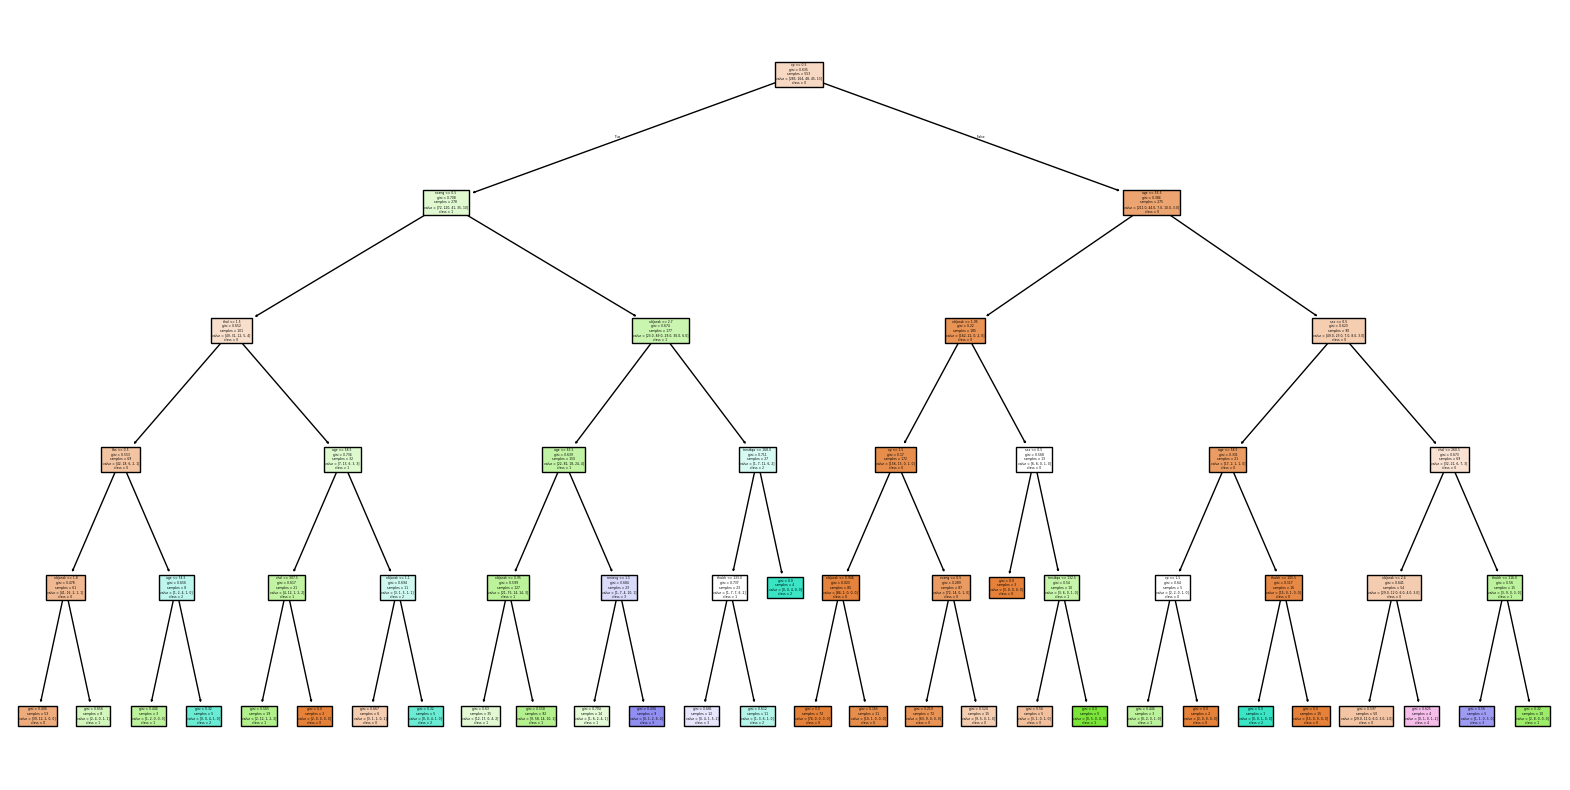

In [ ]:
plt.figure(figsize=(20,10))
plot_tree(best_model, filled=True, feature_names=X.columns, class_names=[str(c) for c in best_model.classes_])
plt.show()

In [ ]:
feature_importances = best_model.feature_importances_
feature_names = X.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
importance_df = importance_df.sort_values('Importance', ascending=False)
importance_df

,Feature,Importance
2,cp,0.393736
0,age,0.146748
9,oldpeak,0.132822
8,exang,0.097654
7,thalch,0.046984
4,chol,0.041455
3,trestbps,0.035798
1,sex,0.034958
11,thal,0.031406
5,fbs,0.027782


# Interview Questions:

**1. What are some common hyperparameters of decision tree models, and how do they affect the model's performance?**

In Decision tree model there are different key hyperparameters.

Common hyperparameters of a Decision Tree include

max_depth, which limits how deep the tree grows—preventing overfitting when set lower.

min_samples_split, the minimum samples needed to split a node—higher values make the model more generalized.

min_samples_leaf, the minimum samples in a leaf node—larger values smooth predictions.

max_features controls how many features are considered for each split, influencing accuracy and computation time

**2. What is the difference between the Label encoding and One-hot encoding?**


Label Encoding assigns a unique integer to each category (e.g., Red=0, Blue=1, Green=2). It is suitable for ordinal data, where order matters.

One-Hot Encoding, on the other hand, creates separate binary columns for each category (e.g., Red=[1,0,0], Blue=[0,1,0], Green=[0,0,1]). It is ideal for nominal data, where order does not matter.